In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import Cdf
import numpy as np

In [2]:
with sqlite3.connect('../data/loc-res.db') as conn:
    do53_local = pd.read_sql('select * from do53_5pct', con=conn)
    dot_local = pd.read_sql('select * from dot_5pct', con=conn)

In [3]:
do53_local['resolver_name'] = 'Local Resolver'

In [4]:
dot_local['resolver_name'] = 'Local Resolver'

In [5]:
do53_local = do53_local[['prb_id', 'country_code', 'continent_code', 'resolver_name', 'rt']]
dot_local = dot_local[['prb_id', 'country_code', 'continent_code', 'resolver_name', 'rt']]

In [6]:
do53_local

,prb_id,country_code,continent_code,resolver_name,rt
0,10007,US,NA,Local Resolver,14.16090
1,10080,JP,AS,Local Resolver,5.49085
2,10087,PL,EU,Local Resolver,23.06465
3,10095,NZ,OC,Local Resolver,20.42100
4,10098,GB,EU,Local Resolver,8.65400
...,...,...,...,...,...
2713,35699,SE,EU,Local Resolver,5.06700
2714,35701,US,NA,Local Resolver,53.92800
2715,35719,NL,EU,Local Resolver,16.14040
2716,35723,KZ,AS,Local Resolver,12.99740


In [7]:
dot_local

,prb_id,country_code,continent_code,resolver_name,rt
0,10342,US,NA,Local Resolver,104.00170
1,14377,DE,EU,Local Resolver,191.90675
2,16233,NL,EU,Local Resolver,148.06850
3,17525,FR,EU,Local Resolver,122.72300
4,17609,SE,EU,Local Resolver,66.42740
5,18275,US,NA,Local Resolver,383.77400
6,20324,NL,EU,Local Resolver,156.55865
7,22890,NL,EU,Local Resolver,146.84850
8,23214,SE,EU,Local Resolver,117.80155
9,29989,NL,EU,Local Resolver,145.90230


In [8]:
with sqlite3.connect('../data/pub-res.db') as conn:
    do53_pub = pd.read_sql('select * from do53_5pct', con=conn)
    dot_pub = pd.read_sql('select * from dot_5pct', con=conn)

In [9]:
do53_pub

,prb_id,country_code,continent_code,resolver_name,rt
0,10006,GB,EU,CZ.NIC ODVR,50.22660
1,10006,GB,EU,CleanBrowsing,22.13310
2,10006,GB,EU,Cloudflare 1.1.1.1,19.16870
3,10006,GB,EU,Comodo Secure DNS,26.33950
4,10006,GB,EU,DNS.WATCH,31.75100
...,...,...,...,...,...
43795,35742,ZA,AF,Quad9,2.29200
43796,35742,ZA,AF,SafeDNS,12.11000
43797,35742,ZA,AF,UncensoredDNS,196.55605
43798,35742,ZA,AF,VeriSign Public DNS,190.77650


In [10]:
dot_pub

,prb_id,country_code,continent_code,resolver_name,rt
0,10006,GB,EU,CleanBrowsing,297.26800
1,10006,GB,EU,Cloudflare 1.1.1.1,164.38140
2,10006,GB,EU,Google Public DNS,155.04670
3,10006,GB,EU,Quad9,177.32480
4,10006,GB,EU,UncensoredDNS,958.34600
...,...,...,...,...,...
14666,35724,KR,AS,UncensoredDNS,1343.76425
14667,35742,ZA,AF,CleanBrowsing,1258.35970
14668,35742,ZA,AF,Cloudflare 1.1.1.1,96.99155
14669,35742,ZA,AF,Google Public DNS,279.46590


In [11]:
do53 = do53_local.append(do53_pub)

In [12]:
do53

,prb_id,country_code,continent_code,resolver_name,rt
0,10007,US,NA,Local Resolver,14.16090
1,10080,JP,AS,Local Resolver,5.49085
2,10087,PL,EU,Local Resolver,23.06465
3,10095,NZ,OC,Local Resolver,20.42100
4,10098,GB,EU,Local Resolver,8.65400
...,...,...,...,...,...
43795,35742,ZA,AF,Quad9,2.29200
43796,35742,ZA,AF,SafeDNS,12.11000
43797,35742,ZA,AF,UncensoredDNS,196.55605
43798,35742,ZA,AF,VeriSign Public DNS,190.77650


In [13]:
dot = dot_local.append(dot_pub)

In [14]:
dot

,prb_id,country_code,continent_code,resolver_name,rt
0,10342,US,NA,Local Resolver,104.00170
1,14377,DE,EU,Local Resolver,191.90675
2,16233,NL,EU,Local Resolver,148.06850
3,17525,FR,EU,Local Resolver,122.72300
4,17609,SE,EU,Local Resolver,66.42740
...,...,...,...,...,...
14666,35724,KR,AS,UncensoredDNS,1343.76425
14667,35742,ZA,AF,CleanBrowsing,1258.35970
14668,35742,ZA,AF,Cloudflare 1.1.1.1,96.99155
14669,35742,ZA,AF,Google Public DNS,279.46590


In [15]:
color_dict = {'Local Resolver': (0.12156862745098039,
  0.4666666666666667,
  0.7058823529411765),
 'CZ.NIC ODVR': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'CleanBrowsing': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Cloudflare 1.1.1.1': (1.0, 0.7333333333333333, 0.47058823529411764),
 'Comodo Secure DNS': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313),
 'DNS.WATCH': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'Google Public DNS': (0.8392156862745098,
  0.15294117647058825,
  0.1568627450980392),
 'OpenDNS': (1.0, 0.596078431372549, 0.5882352941176471),
 'OpenNIC': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'Oracle + Dyn': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Quad9': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'SafeDNS': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'UncensoredDNS': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'VeriSign Public DNS': (0.9686274509803922,
  0.7137254901960784,
  0.8235294117647058),
 'Yandex.DNS': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'Neustar UltraRecursive': (0.7803921568627451,
  0.7803921568627451,
  0.7803921568627451)}

In [16]:
markers = {  'CleanBrowsing' : 'o',
             'Cloudflare 1.1.1.1' : 'v',
             'Comodo Secure DNS' : '^',
             'CZ.NIC ODVR' : '<',
             'Oracle + Dyn' : '>',
             'DNS.WATCH' : 's',
             'Google Public DNS' : 'p',
             'Neustar UltraRecursive' : 'h',
             'OpenDNS' : 'd',
             'OpenNIC' : '*',
             'Quad9' : '1',
             'SafeDNS' : '2',
             'UncensoredDNS' : '3',
             'VeriSign Public DNS' : '4',
             'Yandex.DNS' : 'x',
             'Local Resolver' : 'D'
         }

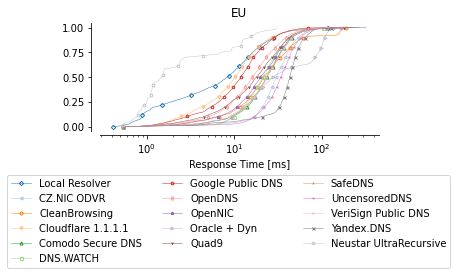

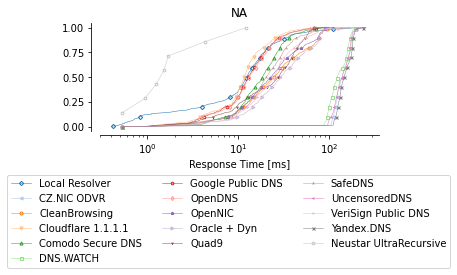

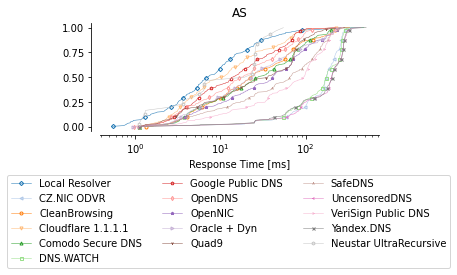

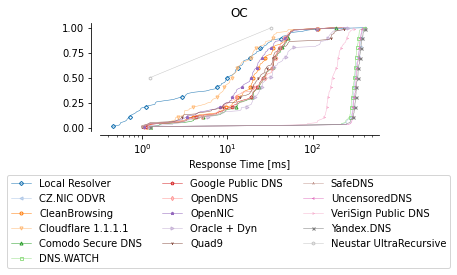

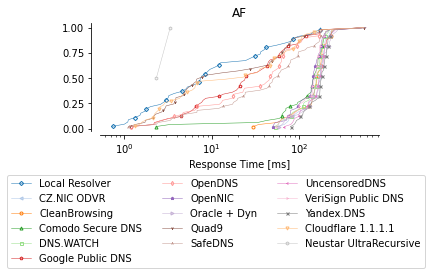

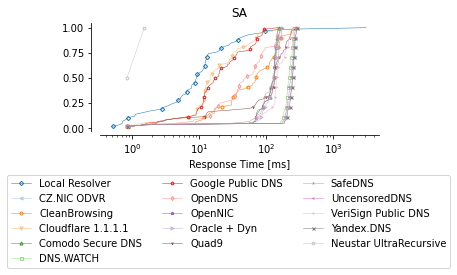

In [17]:
with open('cdfs/cdf-response-time-by-continent-Do53-percentiles.csv', 'w+') as f:

    # one plot for each continent
    for cont in ['EU', 'NA', 'AS', 'OC', 'AF', 'SA']:

        do53_cont = do53[do53['continent_code'] == cont]

        fig, ax = plt.subplots(figsize=(5,2))

        # one line for each resolver
        for res in do53_cont['resolver_name'].unique():
            cdf = Cdf.MakeCdfFromList(do53_cont[do53_cont['resolver_name'] == res]['rt'])
            ax.plot(cdf.xs, cdf.ps, label=res,
                    linestyle='-', linewidth=0.5, color=color_dict[res],
                    marker=markers[res], markersize=3, fillstyle='none', markevery=max(1, int(len(cdf.xs)/10))
                   )

            # write CDF to CSV 
            skip = max(1, int(len(cdf.xs)/150))
            f.write('--- %s (%s) ---\n' % (res, cont))
            for x, p in list(zip(cdf.xs, cdf.ps))[::skip]:
                f.write('%.2f \t %.5f\n' % (x, p))
            f.write('\n===========================\n\n')

        ax.set_title(cont)
        ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(-0.35, -1.3))
        ax.set_xscale('log')
        ax.set_xlabel('Response Time [ms]')

        ax.grid(False)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('axes', -0.03))
        ax.spines['left'].set_position(('axes', -0.03))

#         fig.savefig('../plots/cdf-response-time-Do53-%s.pdf' % cont, bbox_inches='tight')


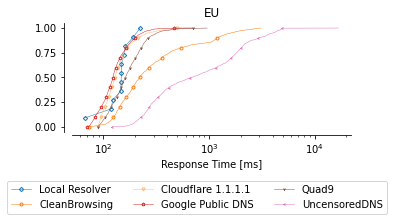

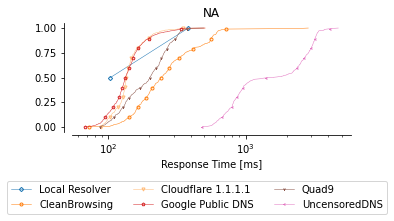

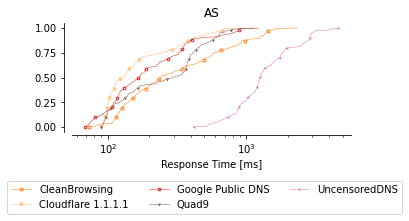

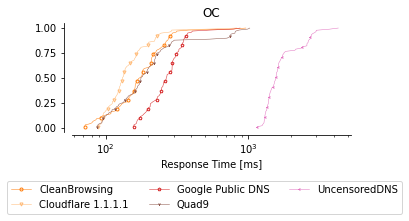

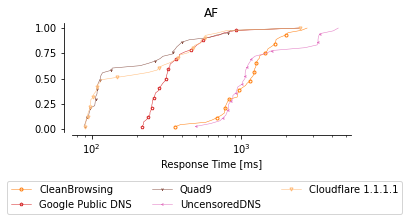

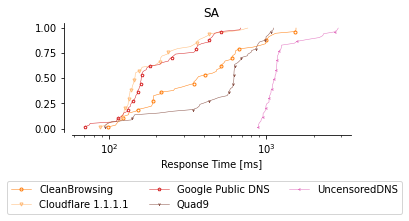

In [18]:
with open('cdfs/cdf-response-time-by-continent-DoT-percentiles.csv', 'w+') as f:

    # one plot for each continent
    for cont in ['EU', 'NA', 'AS', 'OC', 'AF', 'SA']:
        
        dot_cont = dot[dot['continent_code'] == cont]

        fig, ax = plt.subplots(figsize=(5,2))

        # one line for each resolver
        for res in dot_cont['resolver_name'].unique():
            cdf = Cdf.MakeCdfFromList(dot_cont[dot_cont['resolver_name'] == res]['rt'])
            ax.plot(cdf.xs, cdf.ps, label=res,
                    linestyle='-', linewidth=0.5, color=color_dict[res],
                    marker=markers[res], markersize=3, fillstyle='none', markevery=max(1, int(len(cdf.xs)/10))
                   )

            # write CDF to CSV 
            skip = max(1, int(len(cdf.xs)/150))
            f.write('--- %s (%s) ---\n' % (res, cont))
            for x, p in list(zip(cdf.xs, cdf.ps))[::skip]:
                f.write('%.2f \t %.5f\n' % (x, p))
            f.write('\n===========================\n\n')



        ax.set_title(cont)
        ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(-0.25, -0.8))
        ax.set_xscale('log')
        ax.set_xlabel('Response Time [ms]')

        ax.grid(False)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('axes', -0.03))
        ax.spines['left'].set_position(('axes', -0.03))

#         fig.savefig('../plots/cdf-response-time-DoT-%s.pdf' % cont, bbox_inches='tight')


In [19]:
import seaborn as sns

In [20]:
from matplotlib.ticker import FuncFormatter

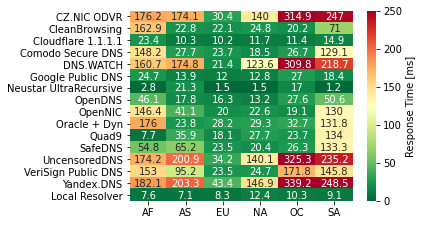

In [21]:
ordered_index = ['CZ.NIC ODVR',
                 'CleanBrowsing',
                 'Cloudflare 1.1.1.1',
                 'Comodo Secure DNS',
                 'DNS.WATCH',
                 'Google Public DNS',
                 'Neustar UltraRecursive',
                 'OpenDNS',
                 'OpenNIC',
                 'Oracle + Dyn',
                 'Quad9',
                 'SafeDNS',
                 'UncensoredDNS',
                 'VeriSign Public DNS',
                 'Yandex.DNS',
                 'Local Resolver']

fig, ax = plt.subplots(figsize=(5, 3.5))
ax = sns.heatmap(pd.crosstab(do53['continent_code'], do53['resolver_name'],
                             values=do53['rt'], aggfunc=np.median
                            ).T.round(1).reindex(ordered_index),
            annot=True,
            cmap="RdYlGn_r",
            cbar_kws={'label' : 'Response Time [ms]',
#                       'format': FuncFormatter(lambda x, pos: '{:.1%}'.format(x))
                     },
            fmt='g',
            vmin=0,
            vmax=250,
           )
ax.set_xlabel('')
ax.set_ylabel('')

fig.savefig('../plots/do53-rt-heatmap.pdf', bbox_inches='tight')

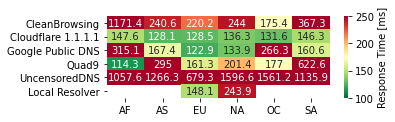

In [22]:
ordered_index = ['CleanBrowsing',
                 'Cloudflare 1.1.1.1',
                 'Google Public DNS',
                 'Quad9',
                 'UncensoredDNS',
                 'Local Resolver']

fig, ax = plt.subplots(figsize=(5, 1.5))
ax = sns.heatmap(pd.crosstab(dot['continent_code'], dot['resolver_name'],
                             values=dot['rt'], aggfunc=np.median
                            ).T.round(1).reindex(ordered_index),
            annot=True,
            cmap="RdYlGn_r",
            cbar_kws={'label' : 'Response Time [ms]',
#                       'format': FuncFormatter(lambda x, pos: '{:.1%}'.format(x))
                     },
            fmt='g',
            vmin=100,
            vmax=250,
           )
ax.set_xlabel('')
ax.set_ylabel('')

fig.savefig('../plots/dot-rt-heatmap.pdf', bbox_inches='tight')